# Classification Analysis (Part A)
A. Implementation of Support Vector Machines (SVM) for classifying images of handwritten digits into their respective numerical classes (0 to 9).

In [1]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Load digits dataset (0-9 images, 8x8 pixels each)
digits = datasets.load_digits()

In [3]:
X = digits.data      # feature vectors (64 features = 8x8 pixels)
y = digits.target    # labels (0–9)

In [4]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Feature scaling (SVM performs better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Train Support Vector Machine classifier (RBF kernel)
svm = SVC(kernel="rbf", gamma=0.001, C=10)
svm.fit(X_train, y_train)

SVC(C=10, gamma=0.001)

In [7]:
# Predictions
y_pred = svm.predict(X_test)

In [8]:
# Evaluation
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [9]:
print("Confusion Matrix:\n", cm)
print("\nAccuracy:", round(acc, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 51  0  1  0  0  1  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 65  1  0  0  0]
 [ 1  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  0  0  0  0  0  0  0 42  1]
 [ 0  0  0  0  0  0  0  0  3 56]]

Accuracy: 0.9815

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      1.00      1.00        50
           2       0.98      1.00      0.99        47
           3       1.00      0.94      0.97        54
           4       1.00      1.00      1.00        60
           5       0.98      0.98      0.98        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.91      0.98      0.94        43
           9       0.97      0.95      0.96        59

    accurac

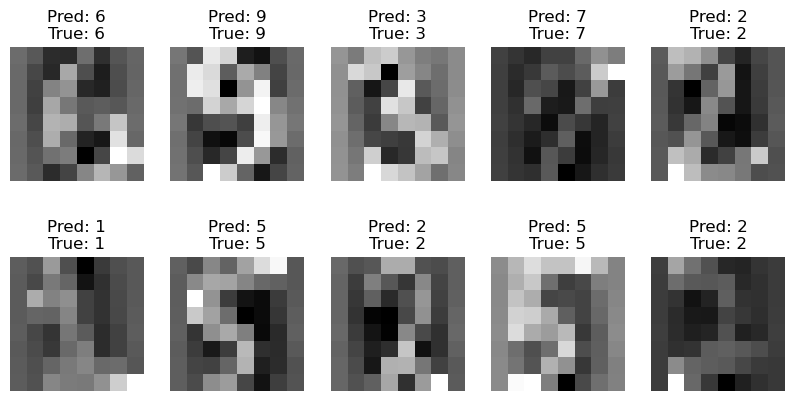

In [10]:
# Show some test images with predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')   # use test images
    ax.set_title(f"Pred: {y_pred[i]}\nTrue: {y_test[i]}")
    ax.axis("off")
plt.show()